In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv")
test_data = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")

# **PREPROCESSING**

In [3]:
train_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [4]:
train_data.shape

(175000, 17)

In [5]:
train_data.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [7]:
train_data['tpep_pickup_datetime'] = pd.to_datetime(train_data['tpep_pickup_datetime'])

train_data['pickup_year'] = train_data['tpep_pickup_datetime'].dt.year
train_data['pickup_month'] = train_data['tpep_pickup_datetime'].dt.month
train_data['pickup_date'] = train_data['tpep_pickup_datetime'].dt.day
train_data['pickup_time'] = train_data['tpep_pickup_datetime'].dt.time
train_data = train_data.drop('tpep_pickup_datetime', axis=1)

In [8]:
train_data['tpep_dropoff_datetime'] = pd.to_datetime(train_data['tpep_dropoff_datetime'])

train_data['dropoff_year'] = train_data['tpep_dropoff_datetime'].dt.year
train_data['dropoff_month'] = train_data['tpep_dropoff_datetime'].dt.month
train_data['dropoff_date'] = train_data['tpep_dropoff_datetime'].dt.day
train_data['dropoff_time'] = train_data['tpep_dropoff_datetime'].dt.time
train_data = train_data.drop('tpep_dropoff_datetime', axis=1)

In [9]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder() # converting strings to number
train_data[['store_and_fwd_flag','payment_type', 'pickup_time' , 'dropoff_time' ]]

oe.fit(train_data[['store_and_fwd_flag','payment_type', 'pickup_time' , 'dropoff_time']])

train_data[['store_and_fwd_flag','payment_type', 'pickup_time' , 'dropoff_time']]= oe.transform(train_data[['store_and_fwd_flag','payment_type', 'pickup_time' , 'dropoff_time']])

In [10]:
train_data.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,...,congestion_surcharge,Airport_fee,pickup_year,pickup_month,pickup_date,pickup_time,dropoff_year,dropoff_month,dropoff_date,dropoff_time
0,1,1.0,2.14,1.0,0.0,120,9,1.0,2.5,7.165589,...,2.5,0.0,2023,6,28,41854.0,2023,6,28,39151.0
1,0,1.0,2.70,1.0,0.0,15,215,1.0,3.5,6.067401,...,2.5,0.0,2023,6,29,61933.0,2023,6,29,58231.0
2,1,1.0,1.15,1.0,0.0,167,223,1.0,0.0,4.111547,...,2.5,0.0,2023,6,30,19126.0,2023,6,30,22002.0
3,0,1.0,0.40,1.0,0.0,128,239,1.0,2.5,6.411079,...,2.5,0.0,2023,6,29,28702.0,2023,6,29,31795.0
4,1,3.0,1.10,1.0,0.0,203,52,1.0,1.0,4.769377,...,2.5,0.0,2023,6,29,58395.0,2023,6,29,59435.0


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   passenger_count        168923 non-null  float64
 2   trip_distance          175000 non-null  float64
 3   RatecodeID             168923 non-null  float64
 4   store_and_fwd_flag     168923 non-null  float64
 5   PULocationID           175000 non-null  int64  
 6   DOLocationID           175000 non-null  int64  
 7   payment_type           175000 non-null  float64
 8   extra                  175000 non-null  float64
 9   tip_amount             175000 non-null  float64
 10  tolls_amount           175000 non-null  float64
 11  improvement_surcharge  175000 non-null  float64
 12  total_amount           175000 non-null  float64
 13  congestion_surcharge   168923 non-null  float64
 14  Airport_fee            168923 non-nu

In [12]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='median')
# train_data = pd.DataFrame(imputer.fit_transform(train_data), columns=train_data.columns)

# # Data Preprocessing

**test data**

In [13]:
test_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.0
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.0
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.0
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.0
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.0


In [14]:
test_data.shape

(50000, 16)

In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               50000 non-null  int64  
 1   tpep_pickup_datetime   50000 non-null  object 
 2   tpep_dropoff_datetime  50000 non-null  object 
 3   passenger_count        48221 non-null  float64
 4   trip_distance          50000 non-null  float64
 5   RatecodeID             48221 non-null  float64
 6   store_and_fwd_flag     48221 non-null  object 
 7   PULocationID           50000 non-null  int64  
 8   DOLocationID           50000 non-null  int64  
 9   payment_type           50000 non-null  object 
 10  extra                  50000 non-null  float64
 11  tip_amount             50000 non-null  float64
 12  tolls_amount           50000 non-null  float64
 13  improvement_surcharge  50000 non-null  float64
 14  congestion_surcharge   48221 non-null  float64
 15  Ai

In [16]:
test_data.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1779
trip_distance               0
RatecodeID               1779
store_and_fwd_flag       1779
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     1779
Airport_fee              1779
dtype: int64

In [17]:
test_data['tpep_pickup_datetime'] = pd.to_datetime(test_data['tpep_pickup_datetime'])

test_data['pickup_year'] = test_data['tpep_pickup_datetime'].dt.year
test_data['pickup_month'] = test_data['tpep_pickup_datetime'].dt.month
test_data['pickup_date'] = test_data['tpep_pickup_datetime'].dt.day
test_data['pickup_time'] = test_data['tpep_pickup_datetime'].dt.time
test_data = test_data.drop('tpep_pickup_datetime', axis=1)


In [18]:
test_data['tpep_dropoff_datetime'] = pd.to_datetime(test_data['tpep_dropoff_datetime'])

test_data['dropoff_year'] = test_data['tpep_dropoff_datetime'].dt.year
test_data['dropoff_month'] = test_data['tpep_dropoff_datetime'].dt.month
test_data['dropoff_date'] = test_data['tpep_dropoff_datetime'].dt.day
test_data['dropoff_time'] = test_data['tpep_dropoff_datetime'].dt.time
test_data = test_data.drop('tpep_dropoff_datetime', axis=1)

In [19]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder() # converting strings to number
test_data[['store_and_fwd_flag','payment_type', 'pickup_time' , 'dropoff_time' ]]
oe.fit(train_data[['store_and_fwd_flag','payment_type','pickup_time' , 'dropoff_time']])
test_data[['store_and_fwd_flag','payment_type', 'pickup_time' , 'dropoff_time']]= oe.fit_transform(test_data[['store_and_fwd_flag','payment_type', 'pickup_time' , 'dropoff_time']])


In [20]:
test_data.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,...,congestion_surcharge,Airport_fee,pickup_year,pickup_month,pickup_date,pickup_time,dropoff_year,dropoff_month,dropoff_date,dropoff_time
0,1,1.0,4.95,1.0,0.0,20,3,1.0,1.0,6.067612,...,2.5,0.0,2023,6,29,486.0,2023,6,29,653.0
1,1,1.0,2.10,1.0,0.0,9,81,1.0,2.5,6.191269,...,2.5,0.0,2023,6,30,21190.0,2023,6,30,21208.0
2,1,1.0,0.95,1.0,0.0,92,90,0.0,2.5,3.983872,...,2.5,0.0,2023,6,29,22549.0,2023,6,29,25081.0
3,0,1.0,0.80,1.0,0.0,19,102,1.0,3.5,6.839341,...,2.5,0.0,2023,6,30,30122.0,2023,6,30,30548.0
4,1,1.0,4.01,1.0,0.0,131,229,0.0,0.0,1.468943,...,0.0,0.0,2023,6,29,15363.0,2023,6,29,16008.0


In [21]:
# test_data = pd.DataFrame(imputer.fit_transform(test_data), columns=test_data.columns)

# Data visualization 

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

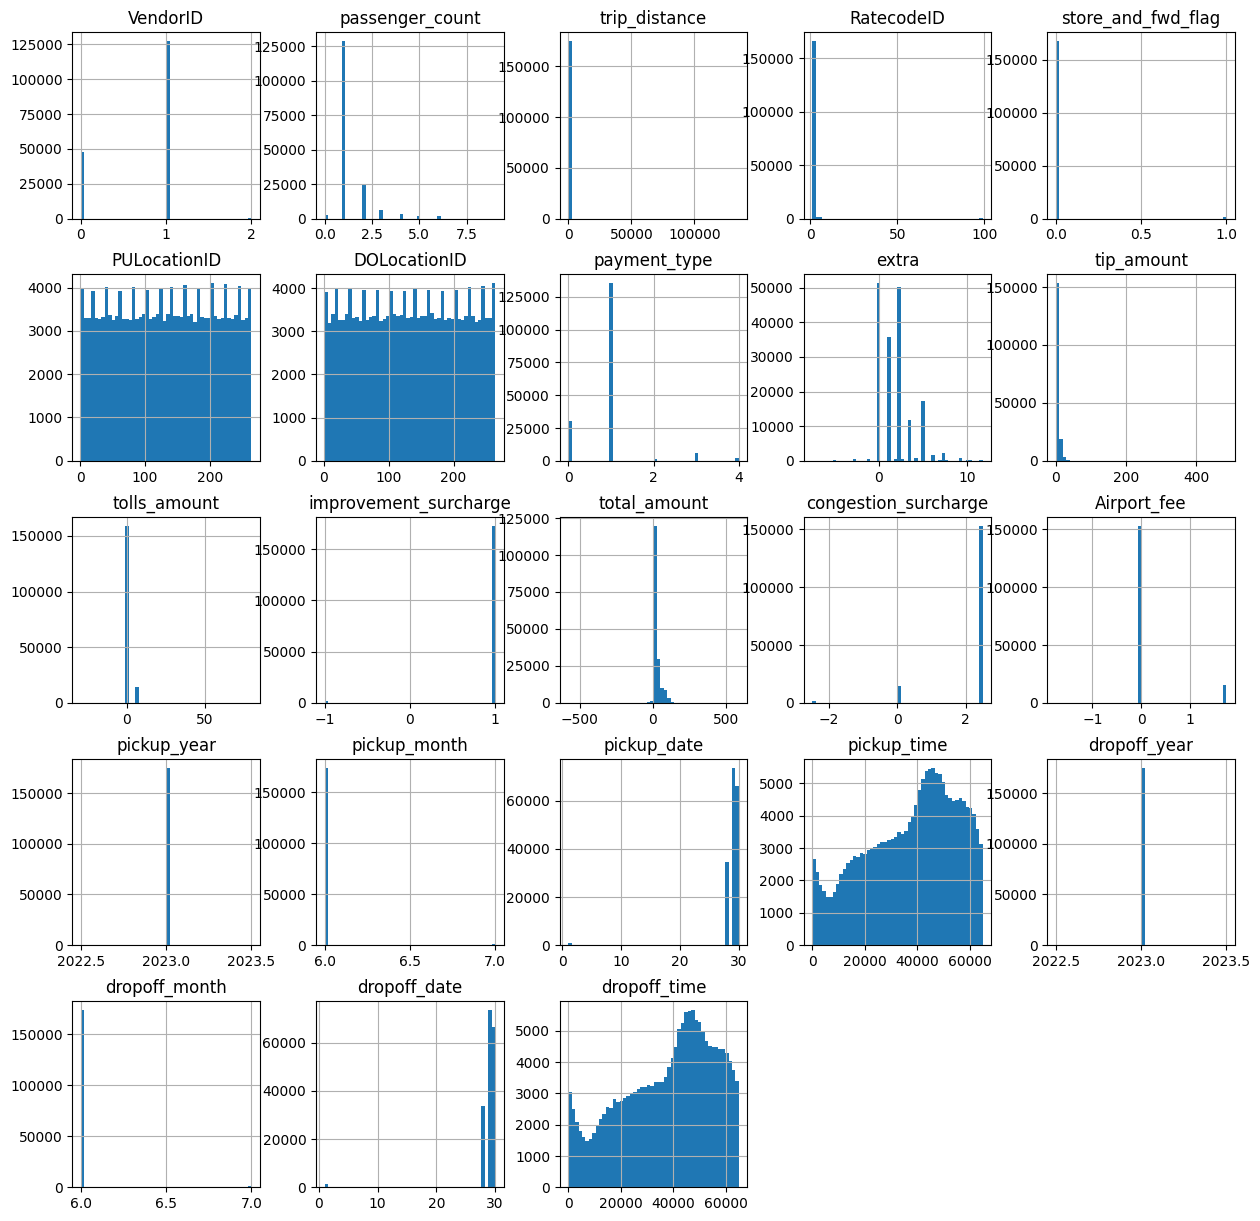

In [23]:
train_data.hist(bins=50,figsize=(15,15))
# display histogram
plt.show()

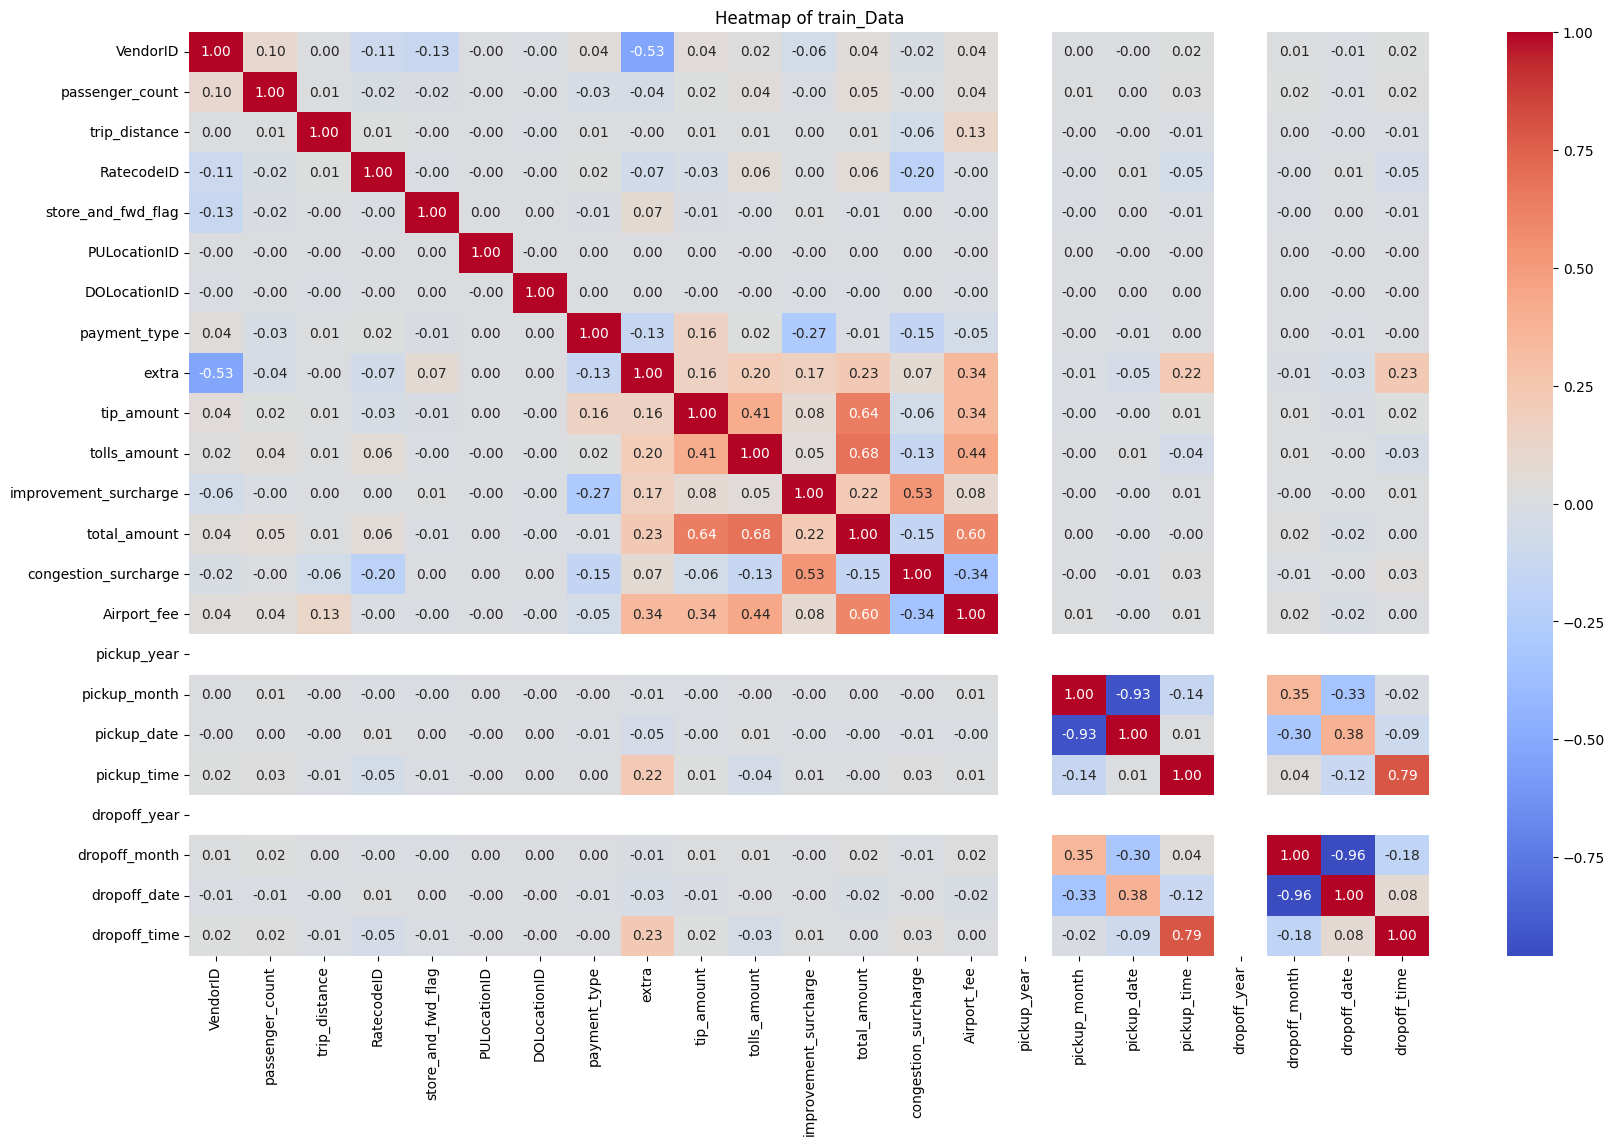

In [24]:
corr_matrix = train_data.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of train_Data')
plt.show()

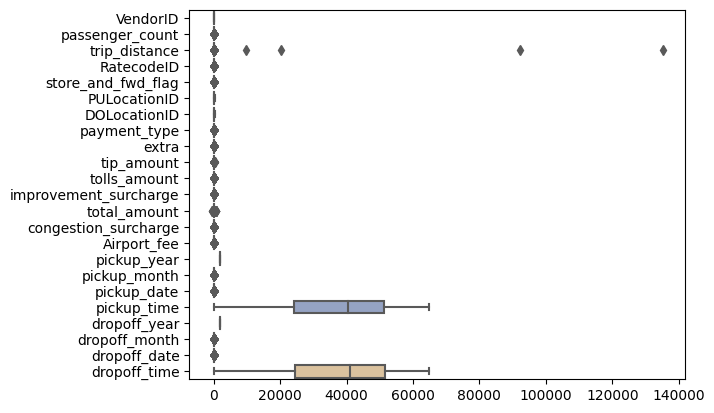

In [25]:
#Box plot
boxi = sns.boxplot(data=train_data, orient="h", palette="Set2")

test data

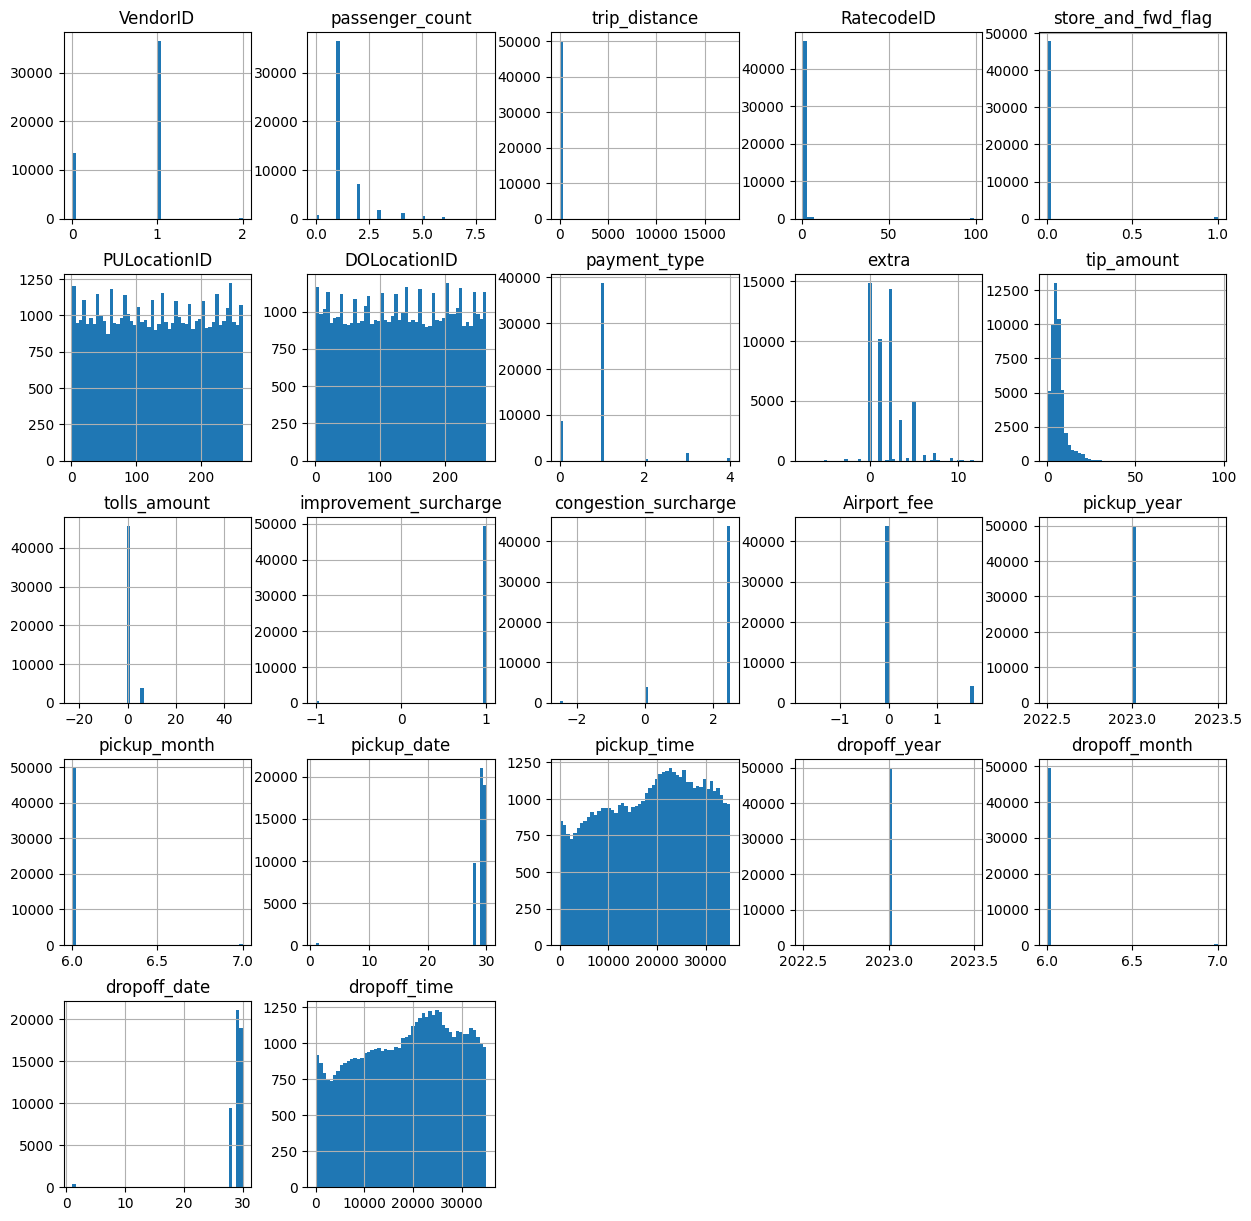

In [26]:
test_data.hist(bins=50,figsize=(15,15))
# display histogram
plt.show()

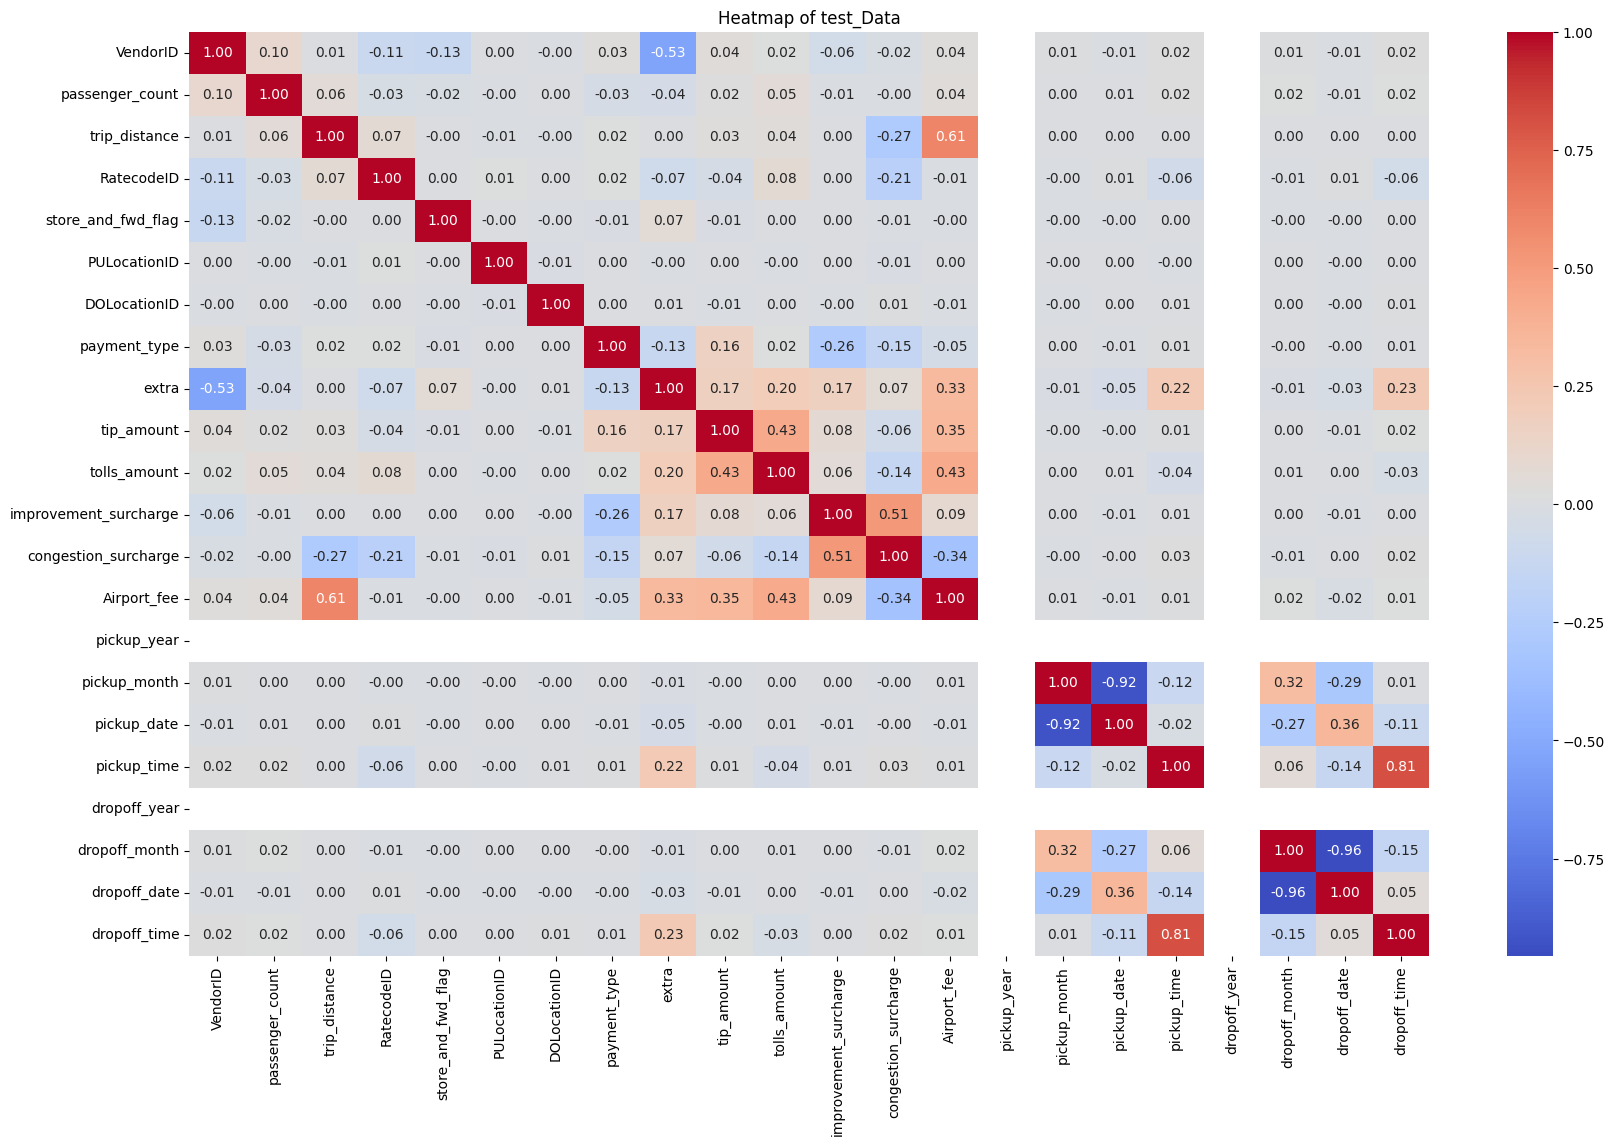

In [27]:
corr_matrix1 = test_data.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of test_Data')
plt.show()

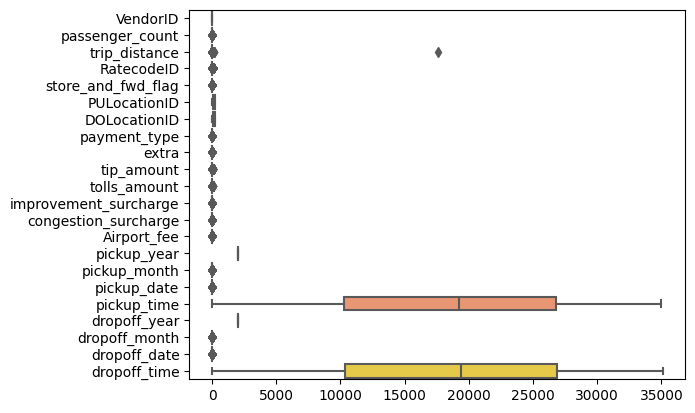

In [28]:
# Box plot
boxi1 = sns.boxplot(data=test_data, orient="h", palette="Set2")

Positive correlations are represented by red colors and negative correlations are represented by blue colors. A positive correlation indicates that as one variable increases, the other variable tends to increase as well and a negative correlation indicates that as one variable increases, the other variable tends to decrease. These values range from -1 to 1.

The boxplot represents the interquartile range (IQR) of the train_data and test_data and the overall shape of the boxplot can provide an indication of the distribution of the train_data and test_data.

pipeline

In [29]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import r2_score
# from sklearn.linear_model import LinearRegression

# # Assuming train_data is your DataFrame

# # Handle missing values
# # train_data = train_data.replace(np.nan, method='ffill')

# # Split the dataset into features (X_train) and the target variable (y_train)
# X = train_data.drop("total_amount", axis=1)
# y = train_data["total_amount"]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a simple pipeline with preprocessing and model
# model = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
#     ('scaler', StandardScaler()),  # Standardize numerical features
#     ('linear', LinearRegression())
# ])

# # Fit the model
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# r2 = r2_score(y_test, y_pred)
# print(f"R-squared score: {r2}")


# **Linear Regression**

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score

In [31]:
# # Handle missing values
# train_data = train_data.replace(np.nan, method='ffill')

# x= train_data.drop("total_amount", axis=1)  # Assuming "total_amount" is the target variable
# y= train_data["total_amount"]

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test  = train_test_split(x, y, test_size = 0.2, random_state=42 ) # y - amount


# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# # Create a Linear Regression model
# model = LinearRegression()

In [32]:
# model.fit(X_train, y_train)

In [33]:
# model.score(X_train, y_train)

In [34]:
# y_pred = model.predict(X_test)
# print(r2_score(y_test, y_pred))

In [35]:
# model.score(X_test, y_test)

**TEST DATA**

In [36]:
# # Handle missing values
# test_data = test_data.replace(np.nan, method='ffill')

In [37]:
# test_data.head()

In [38]:
# test_data.info()

In [39]:
# test_data[:5]

In [40]:
# output = model.predict(test_data)
# output = pd.DataFrame({'ID': np.arange(1,50001), 'total_amount': output})
# output

# **KNN ALGORITHM**

In [41]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_squared_error


# train_data = train_data.replace(np.nan, method='ffill')


# #Split the dataset into features (X_train) and the target variable (y_train)
# X = train_data.drop("total_amount", axis=1)
# y = train_data["total_amount"]

# #Split the data into training and testing sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# #Standardize features using StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# # Create a KNN Regressor model
# k = 5  # Number of neighbors (you can adjust this parameter)
# model = KNeighborsRegressor(n_neighbors=k)



In [42]:
# model.fit(X_train_scaled, y_train)

In [43]:
# model.score(X_train_scaled, y_train)

In [44]:
# model.score(X_val_scaled, y_val)

**test data**

In [45]:
# test_data = test_data.replace(np.nan, method='ffill')

In [46]:
# scaler = StandardScaler()
# X_test_scaled = scaler.fit_transform(test_data)

In [47]:
# X_test_scaled[:5]

In [48]:
# output = model.predict(X_test_scaled)
# output = pd.DataFrame({'ID': np.arange(1,50001), 'total_amount': output})
# output


# **Gradient Boosting regressor**

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

train_data = train_data.replace(np.nan, method='ffill')


# Split the dataset into features (X_train) and the target variable (y_train)
X = train_data.drop("total_amount", axis=1)
y = train_data["total_amount"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a Decision Tree Regressor model
model = GradientBoostingRegressor(
    n_estimators=500,  # You can increase the number of estimators
    learning_rate=0.05,  # Try a lower learning rate
    max_depth=8,  # Experiment with the depth of the trees
    min_samples_split=5,  # Adjust the minimum samples split
    random_state=42
)

In [50]:
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=8, min_samples_split=5,
                          n_estimators=500, random_state=42)

In [51]:
y_pred = model.predict(X_test)

In [52]:
print(r2_score(y_test, y_pred))

0.961067923997692


In [53]:
model.score(X_train, y_train)

0.9862234887448634

In [54]:
model.score(X_test, y_test)

0.961067923997692

**Test data**

In [55]:
test_data = test_data.replace(np.nan, method='ffill')

In [56]:
test_data[:5]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,...,congestion_surcharge,Airport_fee,pickup_year,pickup_month,pickup_date,pickup_time,dropoff_year,dropoff_month,dropoff_date,dropoff_time
0,1,1.0,4.95,1.0,0.0,20,3,1.0,1.0,6.067612,...,2.5,0.0,2023,6,29,486.0,2023,6,29,653.0
1,1,1.0,2.10,1.0,0.0,9,81,1.0,2.5,6.191269,...,2.5,0.0,2023,6,30,21190.0,2023,6,30,21208.0
2,1,1.0,0.95,1.0,0.0,92,90,0.0,2.5,3.983872,...,2.5,0.0,2023,6,29,22549.0,2023,6,29,25081.0
3,0,1.0,0.80,1.0,0.0,19,102,1.0,3.5,6.839341,...,2.5,0.0,2023,6,30,30122.0,2023,6,30,30548.0
4,1,1.0,4.01,1.0,0.0,131,229,0.0,0.0,1.468943,...,0.0,0.0,2023,6,29,15363.0,2023,6,29,16008.0


In [57]:
output = model.predict(test_data)
output = pd.DataFrame({'ID': np.arange(1,50001), 'total_amount': output})
output

,ID,total_amount
0,1,34.580905
1,2,24.692576
2,3,15.708365
3,4,14.289030
4,5,24.643199
...,...,...
49995,49996,14.731122
49996,49997,27.205791
49997,49998,21.451961
49998,49999,36.031919


# **Desicion tree algorithm**

In [58]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import r2_score
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


# # Data Preprocessing 
# train_data = train_data.replace(np.nan, method='ffill')

# # Split the dataset into features (X_train) and the target variable (y_train)
# X = train_data.drop("total_amount", axis=1)
# y = train_data["total_amount"]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # Create a Decision Tree Regressor model
# model = DecisionTreeRegressor(random_state = 42)
# ##88

In [59]:
# model.fit(X_train, y_train)

In [60]:
# y_pred = model.predict(X_test)
# print(r2_score(y_test, y_pred))

In [61]:
# model.score(X_train, y_train)

In [62]:
# model.score(X_test, y_test)

**test data**

In [63]:
# test_data = test_data.replace(np.nan, method='ffill')

In [64]:
# test_data[:5]

In [65]:
# output = model.predict(test_data)
# output = pd.DataFrame({'ID': np.arange(1,50001), 'total_amount': output})
# output

# **Hyperparameter**

In [66]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor  # Replace with the appropriate model for your task
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score

# # Data Preprocessing 
# train_data = train_data.replace(np.nan, method='ffill')

# # Split the dataset into features (X_train) and the target variable (y_train)
# X = train_data.drop("total_amount", axis=1)
# y = train_data["total_amount"]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# param_dist = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [2, 4, 6],
#     'min_samples_leaf': [1, 2]
# }

# model = RandomForestRegressor()

# random_search = RandomizedSearchCV(
#     model,
#     param_distributions=param_dist,
#     #n_iter=5,  # Adjust the number of iterations
#     #scoring='neg_mean_squared_error',
#     cv=5,  # Reduce the number of folds
# #     verbose=2,
# #     n_jobs=-1
# )

# # Fit the RandomizedSearchCV
# random_search.fit(X_train, y_train)


In [67]:
# random_search.best_params_

In [68]:
# random_search.best_estimator_

In [69]:
# # Access the best fitted model
# best_model = random_search.best_estimator_

# # Fit the best model on the training data
# best_model.fit(X_train, y_train)

In [70]:
# y_pred = best_model.predict(X_test)
# print(r2_score(y_test, y_pred))
# #0.9599

test data 

In [71]:
# test_data = test_data.replace(np.nan, method='ffill')

In [72]:
# test_data[:5]

In [73]:
# output = best_model.predict(test_data)
# output = pd.DataFrame({'ID': np.arange(1,50001), 'total_amount': output})
# output

The RandomForestRegressor model has been trained on the train_data and test_data using the best hyperparameters determined through a hyperparameter search. The optimal configuration includes number of estimators are 200, a minimum of 2 samples required to split an internal node, a minimum of 1 sample required to be at a leaf node, and a maximum tree depth of 30. This configuration was found to yield the best performance on the dataset, as measured by the specified evaluation metric.

# **Analysis of Models**

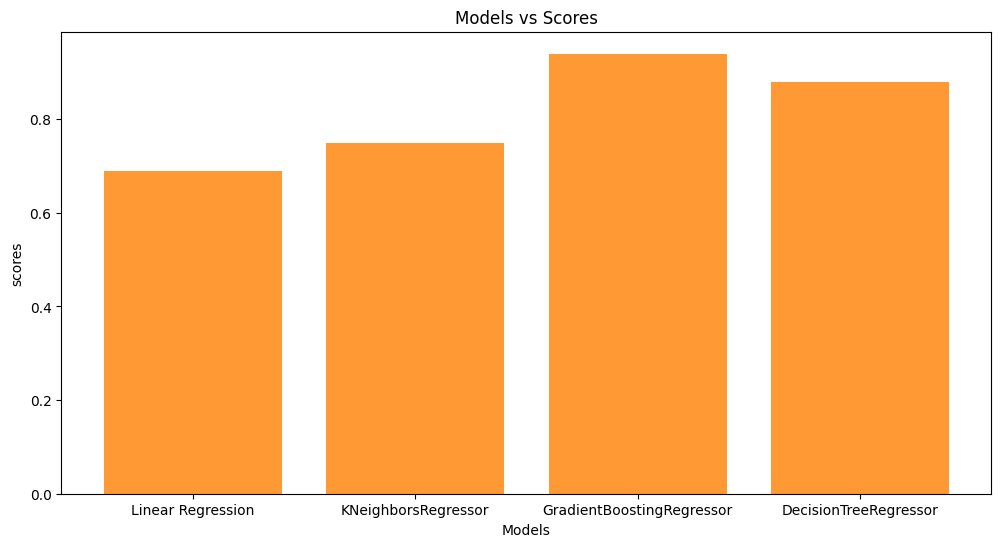

In [74]:
import matplotlib.pyplot as plt

Models = ['Linear Regression', 'KNeighborsRegressor', 'GradientBoostingRegressor', 'DecisionTreeRegressor']
scores = [0.69, 0.75, 0.94, 0.88]

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(Models, scores, color='#FF9933')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('scores')
plt.title('Models vs Scores')

# Display the bar graph
plt.show()

The train_data contains information related to taxi fare, including features such as 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee'
I used correlation matrices or heatmaps to identify strong correlations between features and the target variable, as well as among different features. it highlights the 
relationships that may be important for the analysis. I applied the ordinal encoder to categorical features, impute the null values . Then i applied the models one by one.

- The linear regression model achieved a relatively lower score of 0.69. The model might be underfitting or struggling to capture complex relationships in the data.
- The KNeighborsRegressor model improved the score to 0.75. This model suggests a better fit compared to linear regression but still it does not predict well. 
- The GradientBoostingRegressor model achieved a high score of 0.94, it is indicating strong predictive performance. This model likely captures more complex 
  relationships and patterns in the data.
- The DecisionTreeRegressor model performed well with a score of 0.88.

In [75]:
output.to_csv("submission.csv", index=False)